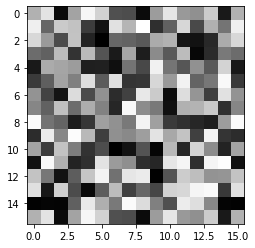

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

imageTable = np.array([[178,228,14,164,246,210,82,79,14,157,230,154,145,204,28,178],
                       [239,104,202,194,64,21,225,182,255,50,100,215,75,177,118,239],
                       [216,155,78,195,38,3,105,101,92,172,179,24,21,43,172,216],
                       [110,99,189,54,187,86,29,167,32,140,91,189,10,46,123,110],
                       [28,172,166,157,34,35,18,118,74,241,119,88,146,92,212,28],
                       [61,97,165,129,222,93,223,56,57,215,155,242,102,121,249,61],
                       [149,69,22,220,77,146,47,68,232,203,16,221,150,65,225,149],
                       [135,100,192,110,174,131,41,248,141,124,19,178,180,201,51,135],
                       [251,117,102,31,57,161,146,123,244,161,61,51,41,33,158,251],
                       [47,235,136,252,186,65,145,138,159,228,169,195,66,244,56,47],
                       [165,63,194,127,53,79,3,21,85,8,185,41,212,141,38,165],
                       [20,249,177,38,50,227,156,144,49,41,230,245,49,245,253,20],
                       [195,121,21,95,197,243,116,230,235,4,86,204,191,148,150,195],
                       [224,26,207,78,12,95,189,67,105,72,212,215,245,249,60,224],
                       [5,8,7,98,233,176,124,251,220,129,82,236,222,137,7,5],
                       [178,228,14,164,246,210,82,79,14,157,230,154,145,204,28,178]], dtype='uint8')

plt.imshow(imageTable, cmap='gray')

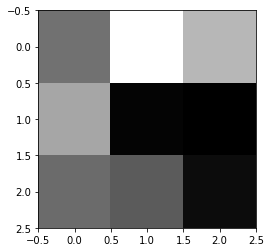

In [2]:
searchTemplate = np.array([[123, 250,185],[170,24,20], [117,102,31]], dtype='uint8')
plt.imshow(searchTemplate, cmap='gray')

<h2>Part A</h2>
<h3>Full Search</h3>

<table style="display:flex; justify-content: flex-start">
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>


In [3]:
def getCenterOfImage(imgArray):
    cx = int(len(imgArray) / 2)
    cy = int(len(imgArray) / 2)
    centerPixelValue = (imgArray[int(imgArray.size / (len(imgArray)*2))][int(imgArray.size / (len(imgArray)*2))])
    return cx,cy

imgCenter = getCenterOfImage(imageTable)
templateCenter = getCenterOfImage(searchTemplate)
print('center of image table: ',imgCenter)
print('center of search template: ',templateCenter)

center of image table:  (8, 8)
center of search template:  (1, 1)


In [4]:
def searchFull(imageTable,searchTemplate,center,search): 

    square = len(searchTemplate) 
    half = int((square - 1)/2)
    (cx,cy) = center
   
    # This is specific to the fullsearch algorithm
    search_radius = int((search-1)/2) # -1, 0, 1
#     print('search_radius: ',search_radius) # Should be 3
   
    ssdPoints = []
    for y in range(cy-search_radius,cy+search_radius+1): # from 5-12
        for x in range(cx-search_radius,cx+search_radius+1): # from 5-12
#             print('x: ',x,'y: ',y)
            # x,y are where in imageTable we are evaluating the searchTemplate
           
            searchArea = imageTable[x-half:x+half+1, y-half:y+half+1]
#             print('searchArea: ', searchArea)
       
            result = searchTemplate - searchArea
            ssdscore = np.sum(result*result)
            ssdPoints.append(((x,y), ssdscore))
           
    return ssdPoints
    
center = getCenterOfImage(imageTable)
ssdPoints_Full = searchFull(imageTable, searchTemplate,center,7)

print(ssdPoints_Full)

[((5, 5), 1381), ((6, 5), 1114), ((7, 5), 956), ((8, 5), 870), ((9, 5), 673), ((10, 5), 888), ((11, 5), 796), ((5, 6), 870), ((6, 6), 1005), ((7, 6), 981), ((8, 6), 970), ((9, 6), 735), ((10, 6), 882), ((11, 6), 827), ((5, 7), 781), ((6, 7), 613), ((7, 7), 770), ((8, 7), 385), ((9, 7), 1058), ((10, 7), 1308), ((11, 7), 775), ((5, 8), 732), ((6, 8), 1222), ((7, 8), 962), ((8, 8), 1112), ((9, 8), 199), ((10, 8), 1403), ((11, 8), 1279), ((5, 9), 1196), ((6, 9), 834), ((7, 9), 787), ((8, 9), 894), ((9, 9), 1052), ((10, 9), 720), ((11, 9), 951), ((5, 10), 1136), ((6, 10), 983), ((7, 10), 902), ((8, 10), 712), ((9, 10), 1005), ((10, 10), 1032), ((11, 10), 1146), ((5, 11), 1225), ((6, 11), 1079), ((7, 11), 845), ((8, 11), 1206), ((9, 11), 709), ((10, 11), 1134), ((11, 11), 1029)]


In [5]:
def getBestScore(ssdPoints):
    scores = []
    
    for ssdPoint in ssdPoints:
        scores.append(ssdPoint[1])
    point = ssdPoints[scores.index(min(scores))][0] # returns point with lowest SSD = best score
    score = min(scores)
#     print('scores: ', scores)      
#     print('min: ',min(scores))
#     print('index: ',scores.index(min(scores)))
#     print('point: ', ssdPoints[25][0])
    
    return point, score
    
bestPoint, bestScore = getBestScore(ssdPoints_Full)
print(bestPoint, bestScore)

(9, 8) 199


<h4>Visualization</h4>

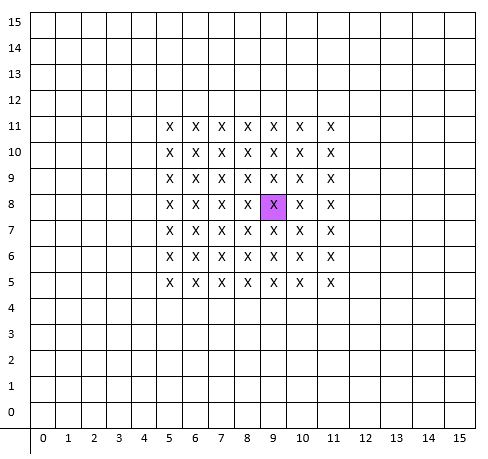

<h2>Part B</h2>
<h3>3 Stage Search (3SS)</h3>


<div style="display:flex; justify-content:space-between">
<table>
    <span style="display:inline;">Stage 1</span>
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
    <tr>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
    <tr>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>

<table>
    <span style="display:inline;">Stage 2</span>
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>
    
<table>
    <span style="display:inline;">Stage 3</span>
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
    <tr>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>
</div>



In [6]:
def search3SS(imageTable,searchTemplate,center,strides): 
    bestScores = dict()
    
    square = len(searchTemplate) 
    half = int((square - 1)/2)
    (cx,cy) = center

    ssdPoints = []
        
    for stride in strides:
#         print('\nstride: ', stride)
        for y in range(cy-stride,cy+stride+1,stride): 
            for x in range(cx-stride,cx+stride+1,stride): 
#                 print('x: ',x,'y: ',y)

                searchArea = imageTable[x-half:x+half+1, y-half:y+half+1]
#                 print('searchArea: ', searchArea)

                result = searchTemplate - searchArea
#                 print('result: ', result)
                ssdscore = np.sum(result*result)
                ssdPoints.append(((x,y), ssdscore))

        bestScores[stride] = getBestScore(ssdPoints)
        (cx,cy) = bestScores[stride][0][0], bestScores[stride][0][1]   

    return ssdPoints, bestScores

ssdPoints_3SS, bestScores = search3SS(imageTable, searchTemplate,center, [3,2,1])

# print(ssdPoints_3SS)
print('\nBest Scores: ',bestScores)
print('\nFINAL SCORE: ', bestScores[1])


Best Scores:  {3: ((5, 8), 732), 2: ((5, 8), 732), 1: ((6, 7), 613)}

FINAL SCORE:  ((6, 7), 613)


<h4>Visualization</h4>

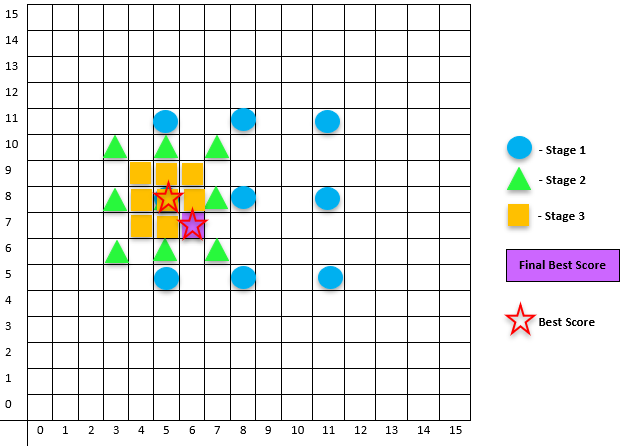

 <h2>Part C</h2>
<h3>4 Stage Search (4SS)</h3>

<div style="display:flex; justify-content:space-between">
<table>
    <span style="display:inline;">Stage 1</span>
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>

<table>
    <span style="display:inline;">Stage 2</span>
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>
    
<table>
    <span style="display:inline;">Stage 3</span>
    <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
</table>
    
<table>
    <span style="display:inline;">Stage 4</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
</div>

In [7]:
def search4SS(imageTable,searchTemplate,center,strides): 
    bestScores = dict()
    
    square = len(searchTemplate) 
    half = int((square - 1)/2)
    (cx,cy) = center

    ssdPoints = []
        
    for stride in strides:
#         print('\nstride: ', stride)
        for y in range(cy-stride,cy+stride+1,stride): 
            for x in range(cx-stride,cx+stride+1,stride): 
#                 print('x: ',x,'y: ',y)

                searchArea = imageTable[x-half:x+half+1, y-half:y+half+1]
#                 print('searchArea: ', searchArea)

                result = searchTemplate - searchArea
#                 print('result: ', result)
                ssdscore = np.sum(result*result)
                ssdPoints.append(((x,y), ssdscore))
#         print(ssdPoints)
        bestScores[stride] = getBestScore(ssdPoints)
        (cx,cy) = bestScores[stride][0][0], bestScores[stride][0][1]   
    
    return ssdPoints, bestScores

ssdPoints_4SS, bestScores_4SS = search4SS(imageTable, searchTemplate,center, [2,2,2,1])

print('\nBest Scores For Each Phase: ',bestScores_4SS)
print('\nFINAL SCORE: ', bestScores_4SS[1])


Best Scores For Each Phase:  {2: ((8, 10), 712), 1: ((9, 11), 709)}

FINAL SCORE:  ((9, 11), 709)


<h4>Visualization</h4>

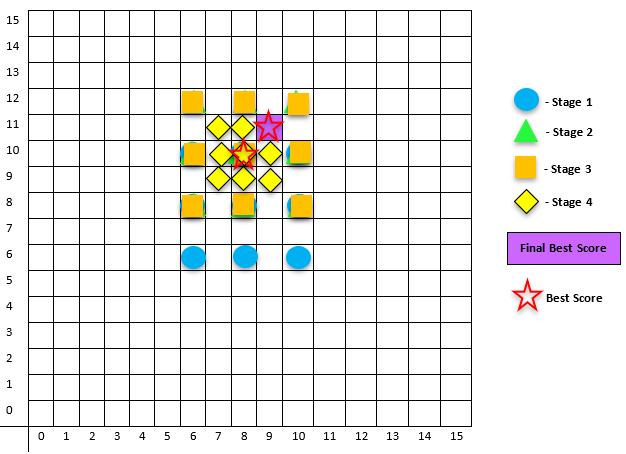

 <h2>Part D</h2>
<h3>HexagonBM</h3>

<div style="display:flex; justify-content:space-between">
<table>
    <span style="display:inline;">Stage 1</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>

<table>
    <span style="display:inline;">Stage 2</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
    
<table>
    <span style="display:inline;">Stage 3</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
    
<table>
    <span style="display:inline;">Stage 4</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
</div>

<h4>Stage 1</h4>

In [8]:
def hexagonBM(imageTable,searchTemplate,center): 
   
    square = len(searchTemplate) 
    half = int((square - 1)/2)
    (cx,cy) = center
    
    pointsOfInterest = [
        (cx-1,cy-2),
        (cx+1,cy-2),
        (cx-2,cy),
        (cx,cy),
        (cx+2,cy),
        (cx-1,cy+2),
        (cx+1,cy+2)
    ]
    
#     print(pointsOfInterest)
    ssdPoints = []
        
    for point in pointsOfInterest:
        x, y = point[0], point[1]
#         print('x: ',x,'y: ',y)

        searchArea = imageTable[x-half:x+half+1, y-half:y+half+1]
#                 print('searchArea: ', searchArea)

        result = searchTemplate - searchArea
#                 print('result: ', result)
        ssdscore = np.sum(result*result)
        ssdPoints.append(((x,y), ssdscore))
    print(ssdPoints)
    bestScores = getBestScore(ssdPoints)
    (cx,cy) = bestScores[0][0], bestScores[0][1]
        
    
    return ssdPoints, bestScores

ssdPoints_hex1, bestScores_hex1 = hexagonBM(imageTable, searchTemplate,center)

print('\nBest Score For Phase 1: ',bestScores_hex1)
print('\nFINAL SCORE: ', bestScores_hex1)

[((7, 6), 981), ((9, 6), 735), ((6, 8), 1222), ((8, 8), 1112), ((10, 8), 1403), ((7, 10), 902), ((9, 10), 1005)]

Best Score For Phase 1:  ((9, 6), 735)

FINAL SCORE:  ((9, 6), 735)


<h4>Stage 2</h4>

In [9]:
ssdPoints_hex2, bestScores_hex2 = hexagonBM(imageTable, searchTemplate,(bestScores_hex1[0][0],bestScores_hex1[0][1]))

print('\nBest Score For Phase 2: ',bestScores_hex2)
print('\nFINAL SCORE: ', bestScores_hex2)

[((8, 4), 1093), ((10, 4), 605), ((7, 6), 981), ((9, 6), 735), ((11, 6), 827), ((8, 8), 1112), ((10, 8), 1403)]

Best Score For Phase 2:  ((10, 4), 605)

FINAL SCORE:  ((10, 4), 605)


<h4>Stage 3</h4>

In [10]:
ssdPoints_hex3, bestScores_hex3 = hexagonBM(imageTable, searchTemplate,(bestScores_hex2[0][0],bestScores_hex2[0][1]))

print('\nBest Score For Phase 3: ',bestScores_hex3)
print('\nFINAL SCORE: ', bestScores_hex3)

[((9, 2), 653), ((11, 2), 571), ((8, 4), 1093), ((10, 4), 605), ((12, 4), 1301), ((9, 6), 735), ((11, 6), 827)]

Best Score For Phase 3:  ((11, 2), 571)

FINAL SCORE:  ((11, 2), 571)


<h4>Stage 4</h4>

In [11]:
def crossBM(imageTable,searchTemplate,center): 
   
    square = len(searchTemplate) 
    half = int((square - 1)/2)
    (cx,cy) = center
    
    pointsOfInterest = [
        (cx,cy+1),
        (cx-1,cy),
        (cx,cy),
        (cx+1,cy),
        (cx,cy-1)
    ]
    
#     print(pointsOfInterest)
    ssdPoints = []
        
    for point in pointsOfInterest:
        x, y = point[0], point[1]
#         print('x: ',x,'y: ',y)

        searchArea = imageTable[x-half:x+half+1, y-half:y+half+1]
#                 print('searchArea: ', searchArea)

        result = searchTemplate - searchArea
#                 print('result: ', result)
        ssdscore = np.sum(result*result)
        ssdPoints.append(((x,y), ssdscore))
    print(ssdPoints)
    bestScores = getBestScore(ssdPoints)
    (cx,cy) = bestScores[0][0], bestScores[0][1]
        
    return ssdPoints, bestScores

ssdPoints_hex4, bestScores_hex4 = crossBM(imageTable, searchTemplate,(bestScores_hex3[0][0],bestScores_hex3[0][1]))

print('\nBest Scores For Phase 4: ',bestScores_hex4)
print('\nFINAL SCORE: ', bestScores_hex4)

[((11, 3), 808), ((10, 2), 1245), ((11, 2), 571), ((12, 2), 940), ((11, 1), 1357)]

Best Scores For Phase 4:  ((11, 2), 571)

FINAL SCORE:  ((11, 2), 571)


<h4>Visualization</h4>

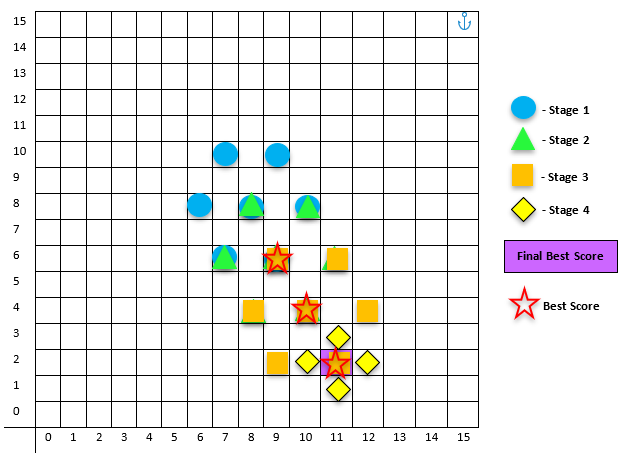

<h2>Part E</h2>
<h3>Diamond</h3>

<div style="display:flex; justify-content:space-between">
<table>
    <span style="display:inline;">Stage 1</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>

<table>
    <span style="display:inline;">Stage 2</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
<table>
    <span style="display:inline;">Stage 3</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
    
<table>
    <span style="display:inline;">Stage 4</span>
    <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
    </tr>
      <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black">x</td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
     <tr >
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
        <td style="border: 1px solid black"></td>
    </tr>
</table>
</div>

<h4>Stage 1</h4>

In [12]:
def diamondBM(imageTable,searchTemplate,center): 
   
    square = len(searchTemplate) 
    half = int((square - 1)/2)
    (cx,cy) = center
    
    pointsOfInterest = [
        (cx,cy-2),
        (cx-1,cy-1),
        (cx+1,cy-1),
        (cx-2,cy),
        (cx,cy),
        (cx+2,cy),
        (cx-1,cy+1),
        (cx+1,cy+1),
        (cx,cy+2)
    ]
    
#     print(pointsOfInterest)
    ssdPoints = []
        
    for point in pointsOfInterest:
        x, y = point[0], point[1]
#         print('x: ',x,'y: ',y)

        searchArea = imageTable[x-half:x+half+1, y-half:y+half+1]
#                 print('searchArea: ', searchArea)

        result = searchTemplate - searchArea
#                 print('result: ', result)
        ssdscore = np.sum(result*result)
        ssdPoints.append(((x,y), ssdscore))
    print(ssdPoints)
    bestScores = getBestScore(ssdPoints)
    (cx,cy) = bestScores[0][0], bestScores[0][1]
        
    
    return ssdPoints, bestScores

ssdPoints_diamond1, bestScores_diamond1 = diamondBM(imageTable, searchTemplate,center)

print('\nBest Score For Phase 1: ',bestScores_diamond1)
print('\nFINAL SCORE: ', bestScores_diamond1)

[((8, 6), 970), ((7, 7), 770), ((9, 7), 1058), ((6, 8), 1222), ((8, 8), 1112), ((10, 8), 1403), ((7, 9), 787), ((9, 9), 1052), ((8, 10), 712)]

Best Score For Phase 1:  ((8, 10), 712)

FINAL SCORE:  ((8, 10), 712)


<h4>Stage 2</h4>

In [13]:
ssdPoints_diamond2, bestScores_diamond2 = diamondBM(imageTable, searchTemplate,(bestScores_diamond1[0][0],bestScores_diamond1[0][1]))

print('\nBest Score For Phase 2: ',bestScores_diamond2)
print('\nFINAL SCORE: ', bestScores_diamond2)

[((8, 8), 1112), ((7, 9), 787), ((9, 9), 1052), ((6, 10), 983), ((8, 10), 712), ((10, 10), 1032), ((7, 11), 845), ((9, 11), 709), ((8, 12), 797)]

Best Score For Phase 2:  ((9, 11), 709)

FINAL SCORE:  ((9, 11), 709)


<h4>Stage 3</h4>

In [14]:
ssdPoints_diamond3, bestScores_diamond3 = diamondBM(imageTable, searchTemplate,(bestScores_diamond2[0][0],bestScores_diamond2[0][1]))

print('\nBest Score For Phase 3: ',bestScores_diamond3)
print('\nFINAL SCORE: ', bestScores_diamond3)

[((9, 9), 1052), ((8, 10), 712), ((10, 10), 1032), ((7, 11), 845), ((9, 11), 709), ((11, 11), 1029), ((8, 12), 797), ((10, 12), 824), ((9, 13), 977)]

Best Score For Phase 3:  ((9, 11), 709)

FINAL SCORE:  ((9, 11), 709)


<h4>Stage 4</h4>

In [15]:
ssdPoints_diamond4, bestScores_diamond4 = crossBM(imageTable, searchTemplate,(bestScores_diamond3[0][0],bestScores_diamond3[0][1]))

print('\nBest Scores For Phase 4: ',bestScores_diamond4)
print('\nFINAL SCORE: ', bestScores_diamond4)

[((9, 12), 910), ((8, 11), 1206), ((9, 11), 709), ((10, 11), 1134), ((9, 10), 1005)]

Best Scores For Phase 4:  ((9, 11), 709)

FINAL SCORE:  ((9, 11), 709)


<h4>Visualization</h4>

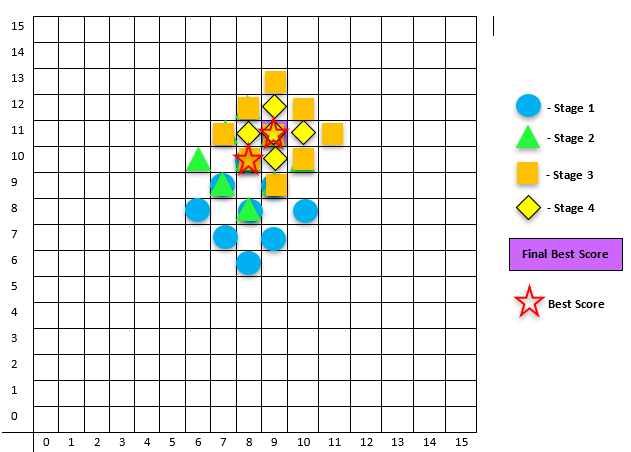